In [1]:
import omidb
from pathlib import Path
from tqdm import tqdm

#get the path of the repo
repo_path = Path().cwd().parent
print(repo_path)

/home/ricardo/master_thesis/diffusion-models_master


# Dataset analysis

     The dataset folder is being mounted to padel from mia server.

To start we want to create a db object that contains all the clients found in the omi-db path. <br>
The second step is to create a list of all the clients that are in the omi-db path. <br>

In [27]:
#define the path to the dataset
reading_path = '/mnt/mia_images/breast/omi-db/image_db/sharing/omi-db/'
# db = omidb.DB(reading_path, clients=['demd1', 'demd116'])
db = omidb.DB(reading_path)
#save clients in a list
clients = [client for client in db]
#The number of clients/petients
len(clients)

## Structure of the OMI-DB dataset object

A <ins> **client** </ins>. represents a patient and can have one or more episodes. <br>
    
- The client object gives information about the client such as:
    - The client id
    - A list of episodes
    - The site (hospital) name
    - The client's status (benign, malignant, normal, interval cancer)

Let's take a client exmaple and analyze it:

In [331]:
client_num = 2
#get a client
client_ex = clients[client_num]
print(f'The client id is: {client_ex.id}')
print(f'The client number of episodes is: {len(client_ex.episodes)}')
print(f'The name of the site is: {client_ex.site.value}')
print(f'The client status is: {client_ex.status.value}')

The client id is: demd268
The client number of episodes is: 1
The name of the site is: jarv
The client status is: Malignant


The next interesting object is the episode <ins> **object** </ins>. <br>
Episodes contain a set of medical procedures or events associated with the treatment or diagnosis. <br>
- The episode object contains:
    - The episode id (unique for within client)
    - Events object: a set of medical procedures or events associated wiith the episode
    - Studies list: studies are collections of screening and diagnostic images
    

In [332]:
episode_num = 0
#Get the first episode of the client as example
episode_ex = client_ex.episodes[episode_num]
#get id of the episode
print(f'The episode id is: {episode_ex.id}')
print(f'The number of studies is: {len(episode_ex.studies)}') if episode_ex.studies else print('No studies')
print(f'The episode type is: {episode_ex.type.value}')
print(f'The episode action is: {episode_ex.action.value}')
print(f'The episode opened date is: {episode_ex.opened_date}')
print(f'The episode closed date is: {episode_ex.closed_date}')
print(f'is the episode closed?: {episode_ex.is_closed}')
print(f'number of lesions in the episode: {len(episode_ex.lesions)}') if episode_ex.lesions else print('No lesions')

# Addiitioanl properties can be given back:
print(f'The episode has benign opinions?: {episode_ex.has_benign_opinions}')
print(f'The episode has malignant opinions?: {episode_ex.has_malignant_opinions}')
#print seperator
print('-----------------------------')
# Get the events object, it shows all the events that happened in the episode
events_ex = episode_ex.events
# print(f'All the events in the episode: \n{events_ex}')
# print(events_ex)


The episode id is: 9999
The number of studies is: 2
The episode type is: First Call
The episode action is: Follow-up (Post-treatment)
The episode opened date is: 2009-08-26
The episode closed date is: 2010-04-29
is the episode closed?: True
No lesions
The episode has benign opinions?: False
The episode has malignant opinions?: True
-----------------------------


The next structure could are <ins> **events** </ins> and <ins> **studies** </ins>. <br>
Studies are imaging examinations made out of <ins>series</ins>. Each serie contains a set of <ins> **images** </ins>. <br>

    Note that not all episodes may have studies!!
This is important to consider, as we care about the episodes that have images (therefore, studies). <br>

In [333]:
# Get the first study of the episode as example
study_num = 0
if episode_ex.studies:
    study_ex = episode_ex.studies[study_num]
    print(f'The study id is: {study_ex.id}')
    print(f'The number of series is: {len(study_ex.series)}')
    print(f'The event type(s) is: {study_ex.event_type}')
    print(f'The study date is: {study_ex.date}')

else:
    print('No studies')

The study id is: 1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2856.0
The number of series is: 2
The event type(s) is: [<Event.screening: 'screening'>]
The study date is: 2009-10-14


Series are the next and final subsrtucture of the dataset. <br>
It is a <ins> **collection of images** </ins> taken during one examination by one modality, for a given position of the patient in the acquisition device. <br>
In full-field digital mammography, each image is usually associated with one series. <br>
- The series object contains:
    - The series id
    - The list of images

The series id is: 1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2862.0
The number of images is: 4
The list of marks in the image is: [Mark(id='3156', lesion_id='1', boundingBox=BoundingBox(x1=1019, y1=1625, x2=1532, y2=1918), conspicuity=<Conspicuity.obvious: 'Obvious'>, architectural_distortion=None, dystrophic_calcification=None, fat_necrosis=None, focal_asymmetry=None, mass=None, suspicious_calcifications=True, milk_of_calcium=None, other_benign_cluster=None, plasma_cell_mastitis=None, benign_skin_feature=None, calcifications=None, suture_calcification=None, vascular_feature=None, benign_classification=None, mass_classification=None)]


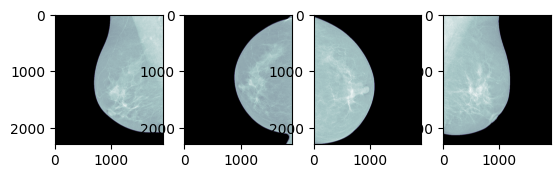

In [341]:
# Get the first series of the study as example
series_num = 1
series_ex = study_ex.series[series_num]
print(f'The series id is: {series_ex.id}')
print(f'The number of images is: {series_ex.num_images}')
#All images in the series can be plotted using
series_ex.plot()
print(f'The list of marks in the image is: {series_ex.images[0].marks}')

The images are the elemental elements of the dataset (from the point of view of our analysis). <br>
Image objects contain all the relevant information about the image. <br>

- The image object contains:
    - The image id: unique for each image
    - Dicom path
    - JSON file path with the DICOM metadata
    - A dictionary containing the DICOM metadata
    - A parsed version of the DICOM file

In [339]:
image_num = 0 # usually there is just one image in the series
# get the first image of the series as example
image_ex = series_ex.images[image_num]

print(f'The image id is: {image_ex.id}')
print(f'The dicom path is: {image_ex.dcm_path}')
print(f'The JSON path is: {image_ex.json_path}')
print(f'The list of marks in the image is: {image_ex.marks}')


The image id is: 1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2865.0
The dicom path is: /mnt/mia_images/breast/omi-db/image_db/sharing/omi-db/images/demd268/1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2856.0/1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2865.0.dcm
The JSON path is: /mnt/mia_images/breast/omi-db/image_db/sharing/omi-db/data/demd268/1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2856.0/1.2.826.0.1.3680043.9.3218.1.1.2807438.9038.1510340992050.2865.0.json
The list of marks in the image is: [Mark(id='3156', lesion_id='1', boundingBox=BoundingBox(x1=1019, y1=1625, x2=1532, y2=1918), conspicuity=<Conspicuity.obvious: 'Obvious'>, architectural_distortion=None, dystrophic_calcification=None, fat_necrosis=None, focal_asymmetry=None, mass=None, suspicious_calcifications=True, milk_of_calcium=None, other_benign_cluster=None, plasma_cell_mastitis=None, benign_skin_feature=None, calcifications=None, suture_calcification=None, vascul